<a href="https://colab.research.google.com/github/aymuos/masters-practise-repo/blob/main/TERM2/ML_Lab/MLLAB-Project/q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Please use the dataset provided for this problem (regression) and polynomial features of degree 3:

(a) Implement a Ridge regression model (Default hyperparameters) (Marks: 4)


(b) Implement a Lasso regression model (Default hyperparameters) (Marks: 4)

(c) Report the impact of the regularization term (α) on the coefficients’ values and the model’s performance. Compare both models and elaborate on your findings. (Marks: 12)

(d) Create polynomial regression models of increasing degree (3-10), calculate and compare their MSEs, and discuss bias, variance, overfitting, and underfitting. (Marks:12)

(e) Create a kernel ridge regression model with α = 1 and evaluate the impact of
different kernels. (Marks: 8)

In [ ]:
pip install pandas scikit-learn seaborn

# Implement Ridge Regression

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_regression

from sklearn.preprocessing import StandardScaler
import operator

from sklearn.linear_model import Ridge, Lasso
from sklearn.kernel_ridge import KernelRidge



In [ ]:
# dataset = "./data/regression/ch24m571.csv"
# df = pd.read_csv(dataset)


In [ ]:
dataset = "./ch24m571_regression.csv"
data = pd.read_csv(dataset)

df = data.copy(deep=True)

In [ ]:
df.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,target
0,-1.322812,0.478125,0.023212,-1.525778,0.732485,0.281675,-2.096557,-0.093123,1.621728,1.907056,19.608239
1,-1.792048,-1.396088,0.544934,0.017083,-0.932962,2.449449,0.790823,0.591299,-0.210120,2.865204,84.902765
2,-0.704341,0.417725,1.074704,1.533996,-0.999278,-0.627299,-1.150429,0.258384,0.329114,0.374948,38.603072
3,0.622519,0.480424,-0.631192,-0.332812,-0.467493,0.568459,0.831351,-0.968186,0.487973,-0.862493,-44.924976
4,0.139064,0.704643,-0.857670,-0.709785,0.634387,-1.249339,0.936795,0.155591,0.770331,1.629276,-0.825850


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature_0  1000 non-null   float64
 1   feature_1  1000 non-null   float64
 2   feature_2  1000 non-null   float64
 3   feature_3  1000 non-null   float64
 4   feature_4  1000 non-null   float64
 5   feature_5  1000 non-null   float64
 6   feature_6  1000 non-null   float64
 7   feature_7  1000 non-null   float64
 8   feature_8  1000 non-null   float64
 9   feature_9  1000 non-null   float64
 10  target     1000 non-null   float64
dtypes: float64(11)
memory usage: 86.1 KB


In [ ]:
# checking the data for null columns and missing values

df.isnull().sum()

,0
feature_0,0
feature_1,0
feature_2,0
feature_3,0
feature_4,0
feature_5,0
feature_6,0
feature_7,0
feature_8,0
feature_9,0


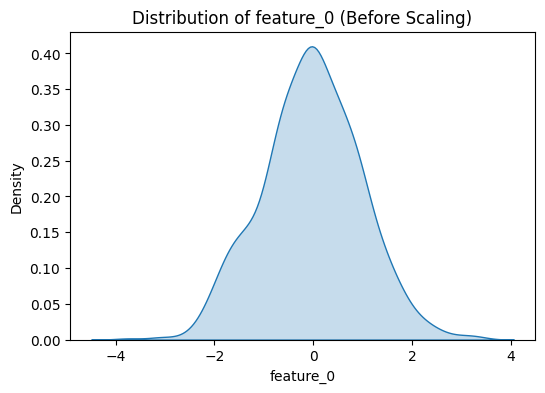

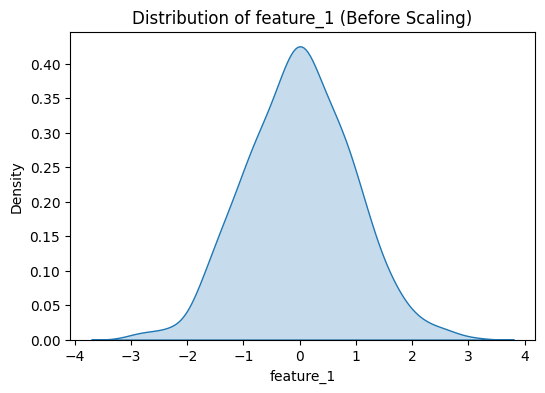

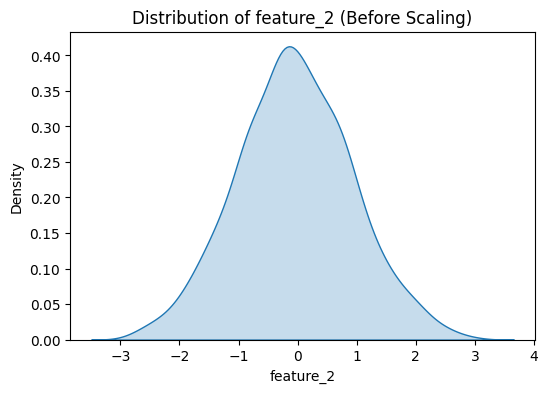

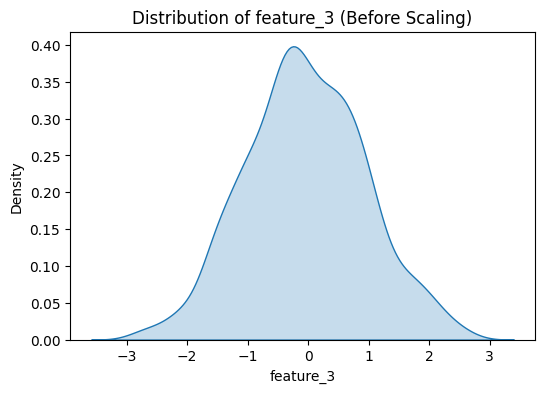

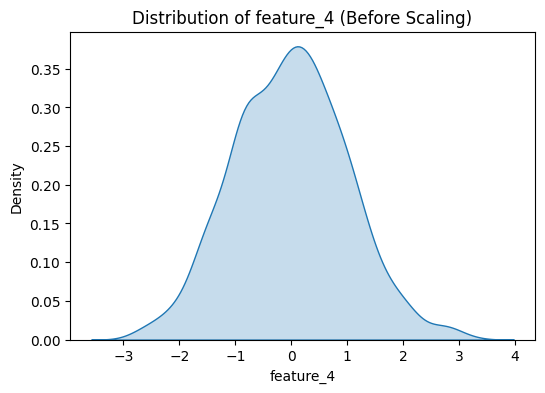

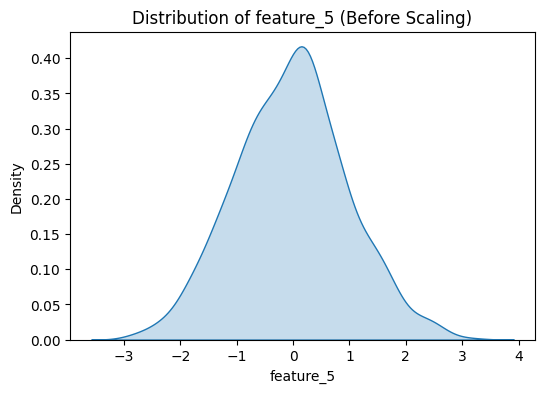

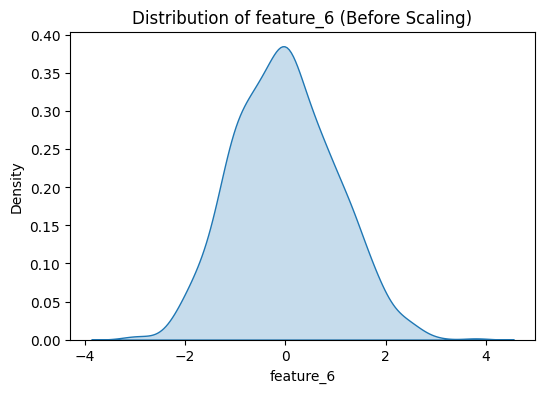

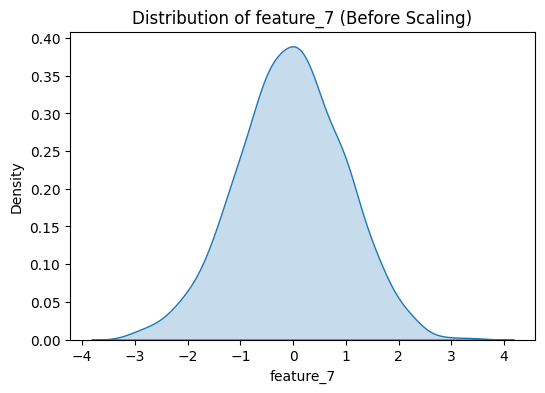

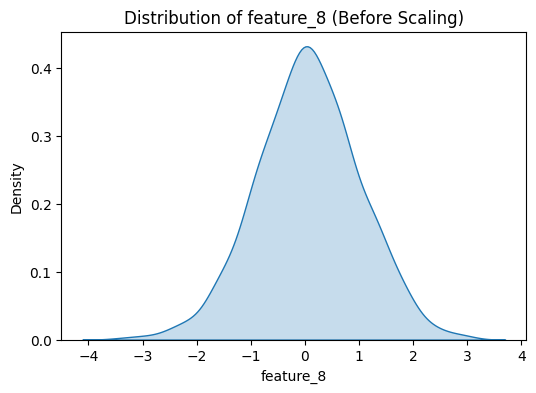

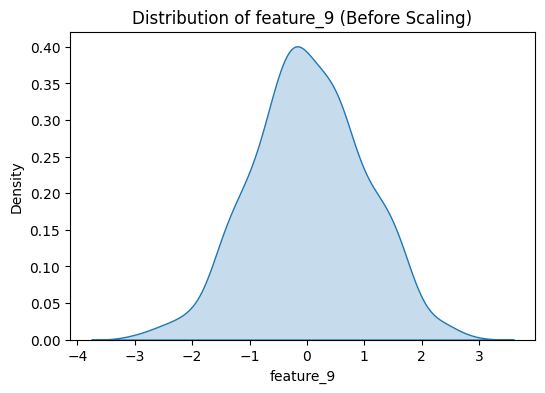

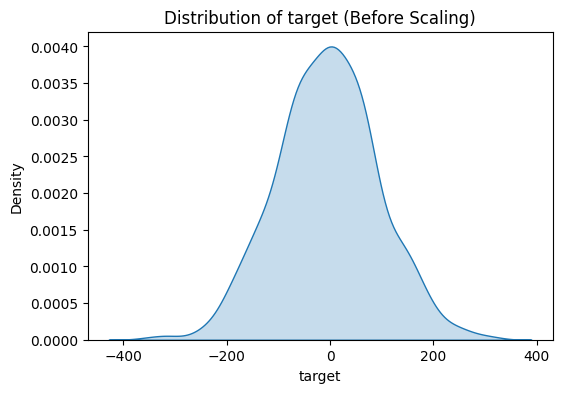

In [ ]:
# Using the KDE plot to visualize the data distribution before performing any operations

for column in df.columns:
    plt.figure(figsize=(6, 4))
    sns.kdeplot(df[column], fill=True)
    plt.title(f'Distribution of {column} (Before Scaling)')
    plt.show()

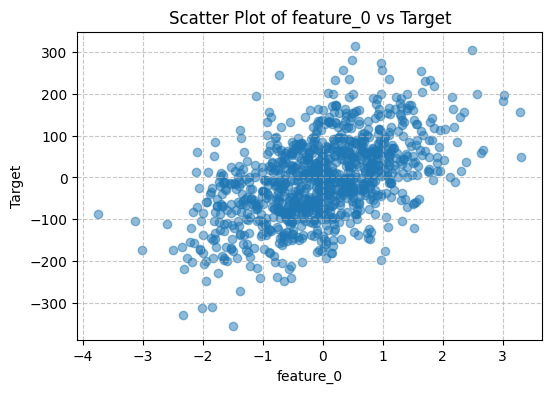

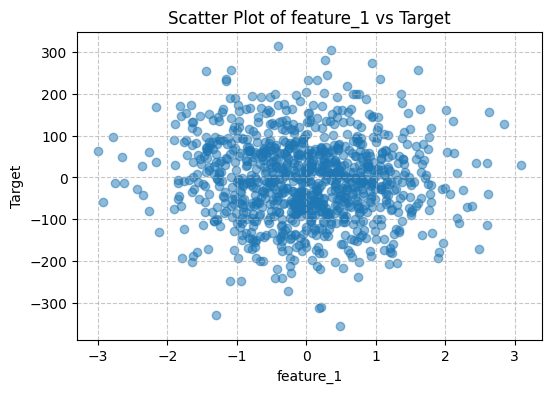

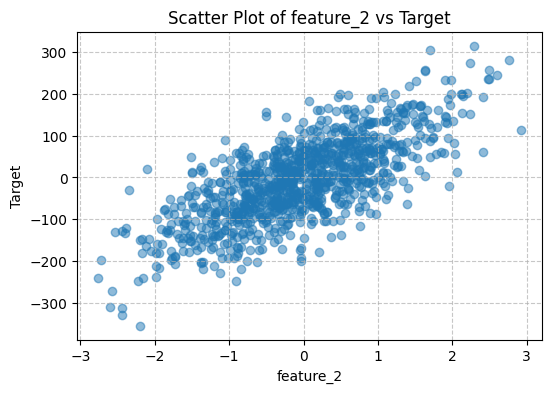

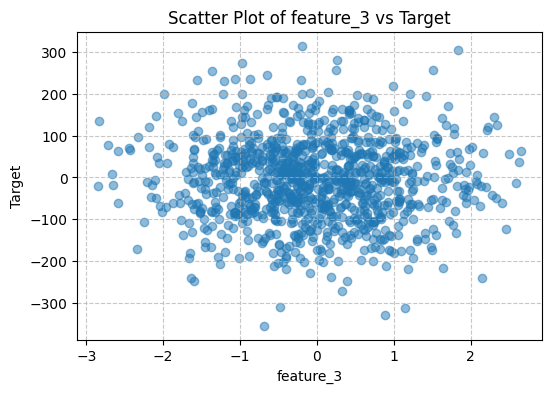

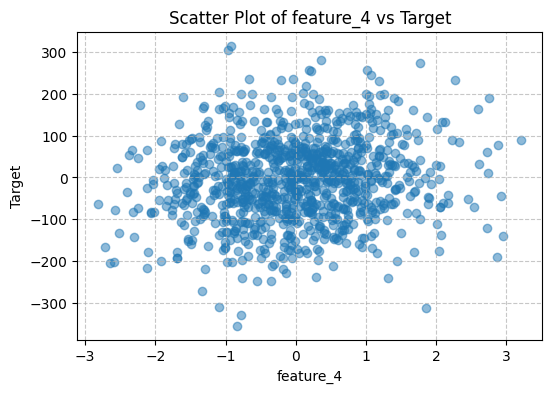

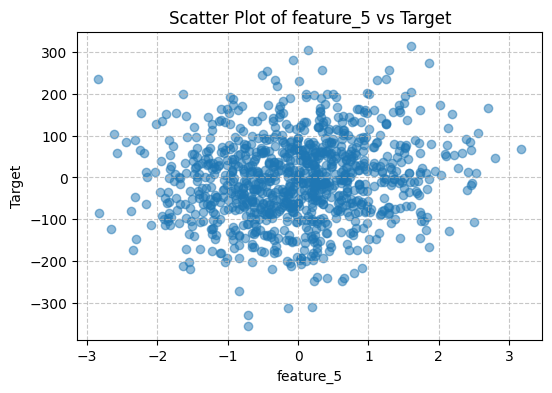

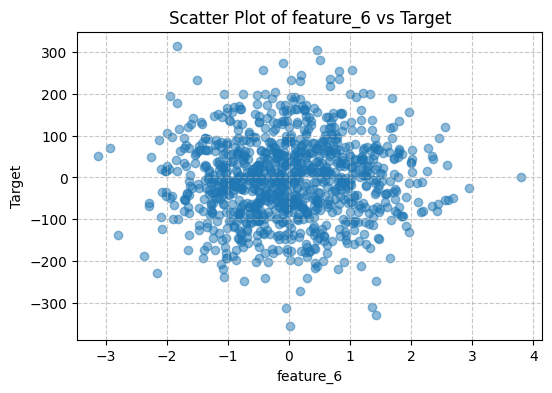

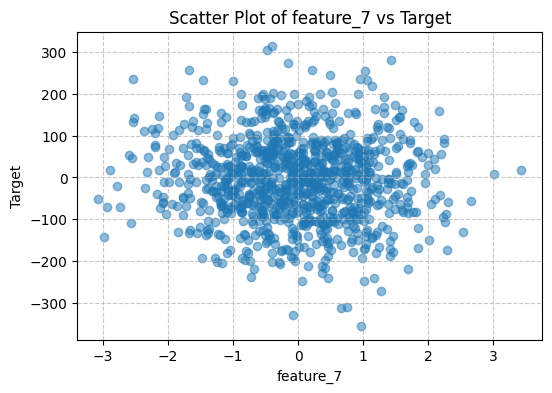

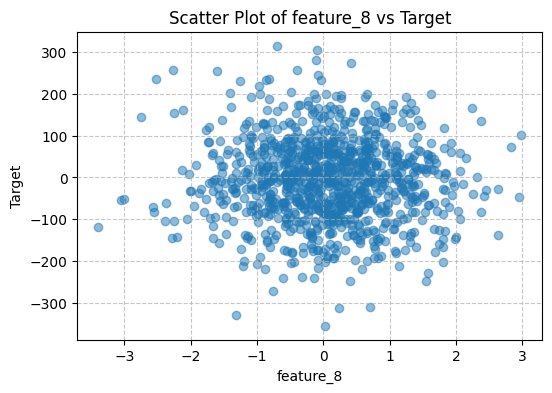

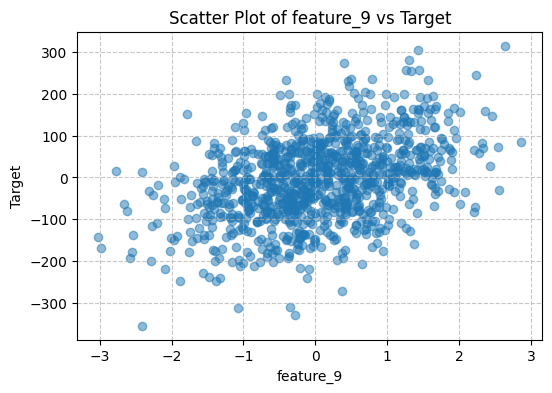

In [ ]:
# Defining features (X) and target (y)
X = df.drop(columns=['target'])  # All columns except 'target'
y = df['target']                 # Only the 'target' column

# Scatter plots for each feature against the target
for column in X.columns:
    plt.figure(figsize=(6, 4))
    plt.scatter(X[column], y, alpha=0.5)
    plt.title(f'Scatter Plot of {column} vs Target')
    plt.xlabel(column)
    plt.ylabel('Target')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()


In [ ]:
# splitting the data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# the data seems to be a normally distributed one mostly , but still i am going to use standard scalar so that i can have
#  standardized values across the board

scaler = StandardScaler()

# Fit and transform the training set & transform for the test set

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

# doing this to prevent data leakage

In [ ]:
# Ridge regression with polynomial features of degree 3
ridge_model = make_pipeline(PolynomialFeatures(3, include_bias=False), Ridge())
ridge_model.fit(X_train_scaled, y_train)

y_test_ridge = ridge_model.predict(X_test_scaled)
y_train_ridge = ridge_model.predict(X_train_scaled)

In [ ]:
mse_test_ridge = mean_squared_error(y_test, y_test_ridge)
print(f'MSE for the Ridge model on test data: {mse_test_ridge}')

MSE for the Ridge model on test data: 0.757158935459192


In [ ]:
# Performing Lasso Regression

lasso_model = make_pipeline(PolynomialFeatures(3, include_bias=False), Lasso(alpha=0.1))
lasso_model.fit(X_train_scaled, y_train)
y_test_lasso = lasso_model.predict(X_test_scaled)
y_train_lasso = lasso_model.predict(X_train)

mse_test_lasso = mean_squared_error(y_test, y_test_lasso)
print(f'MSE for the Lasso model on test data: {mse_test_lasso}')

MSE for the Lasso model on test data: 0.12036674524475778


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but PolynomialFeatures was fitted without feature names
  warnings.warn(


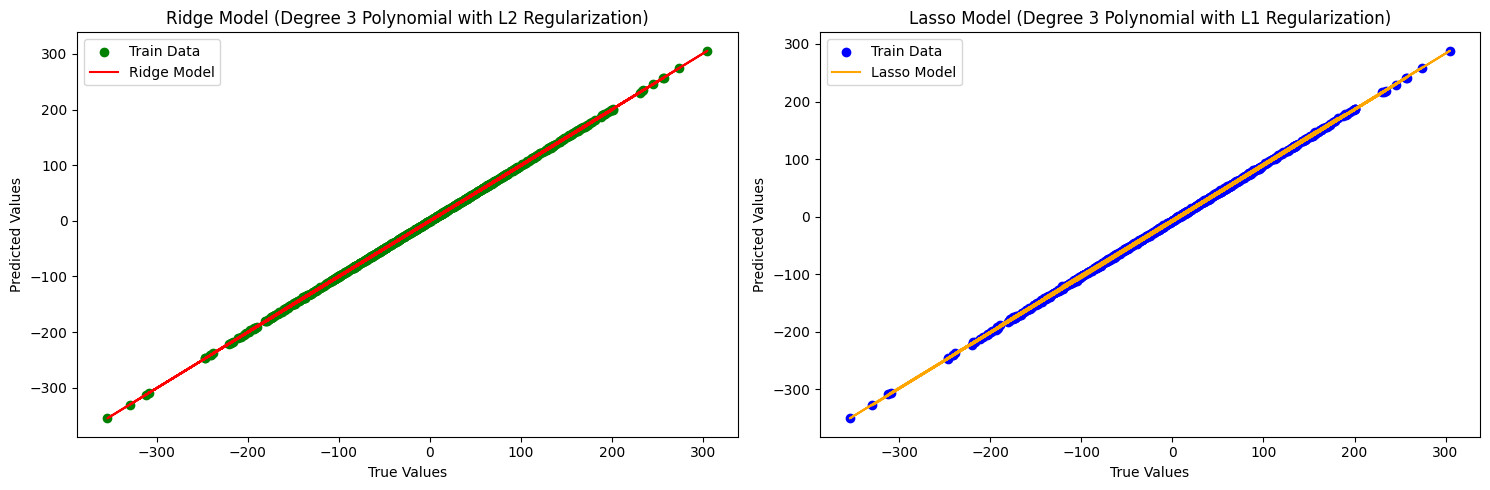

In [ ]:
# plotting the graphs
fig, axs = plt.subplots(1,2, figsize=(15, 5))

# Ridge plot
axs[0].scatter(y_train, y_train_ridge, color='green', label='Train Data')
axs[0].plot(y_train, y_train_ridge, color='red', label='Ridge Model')
axs[0].set_xlabel('True Values')
axs[0].set_ylabel('Predicted Values')
axs[0].set_title('Ridge Model (Degree 3 Polynomial with L2 Regularization)')
axs[0].legend()

# Lasso plot
axs[1].scatter(y_train, y_train_lasso, color='blue', label='Train Data')
axs[1].plot(y_train, y_train_lasso, color='orange', label='Lasso Model')
axs[1].set_xlabel('True Values')
axs[1].set_ylabel('Predicted Values')
axs[1].set_title('Lasso Model (Degree 3 Polynomial with L1 Regularization)')
axs[1].legend()

plt.tight_layout()
plt.show()

In [ ]:
# Create polynomial regression models of increasing degree (3-10), calculate and compare their MSEs, and discuss bias, variance, overfitting, and underfitting.
train_mse = []
test_mse = []

# Test polynomial degrees from 3 to 10
for degree in range(3, 11):
    # Create polynomial features
    poly = PolynomialFeatures(degree, include_bias=False)
    X_train_poly = poly.fit_transform(X_train_scaled)
    X_test_poly = poly.transform(X_test_scaled)

    # Fit a linear regression model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # performing predictions
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)

    # calculating MSE
    train_mse.append(mean_squared_error(y_train, y_train_pred))
    test_mse.append(mean_squared_error(y_test, y_test_pred))

In [ ]:
train_mse , test_mse

([0.006337436623713512,
  3.276261405287368e-25,
  3.612112918155621e-25,
  1.6763003532847542e-24,
  4.170296332916422e-24,
  4.441526618177938e-23,
  2.398140483063386e-22,
  3.088434205402356e-21],
 [0.020063984510064664,
  2755.4382677258395,
  7124.701002277489,
  50671.999262828045,
  176819.39548575683,
  929230.0773288064,
  5778600.442054559,
  23795494.854854442])

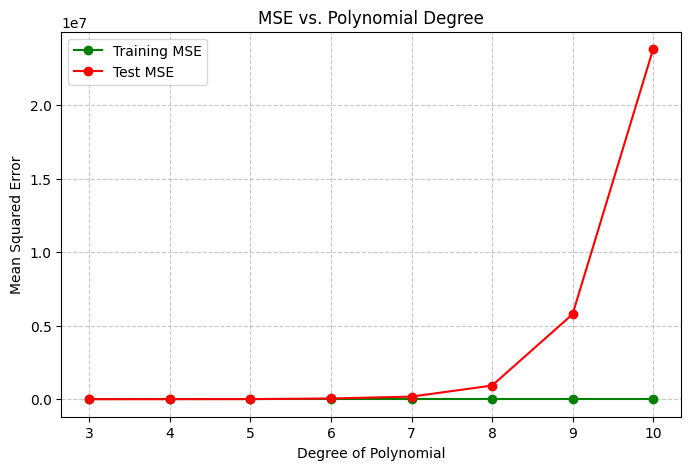

In [ ]:
# plotting mse vs degree

plt.figure(figsize=(8, 5))
plt.plot(range(3, 11), train_mse, marker='o', label='Training MSE', color='green')
plt.plot(range(3, 11), test_mse, marker='o', label='Test MSE', color='red')
plt.title('MSE vs. Polynomial Degree')
plt.xlabel('Degree of Polynomial')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Kernel Ridge Regression MSE:
Kernel: linear | Train MSE: 50.2971 | Test MSE: 50.1510
Kernel: poly | Train MSE: 0.9057 | Test MSE: 1.9265
Kernel: rbf | Train MSE: 326.3587 | Test MSE: 799.6944


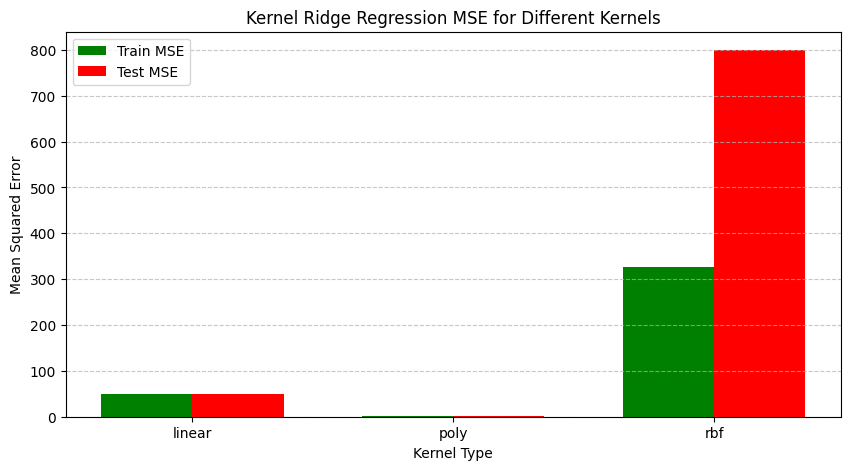

In [ ]:
# Create a kernel ridge regression model with α = 1 and evaluate the impact of different kernels.

# Define kernel types
kernels = ['linear', 'poly', 'rbf']
mse_train = []
mse_test = []

# Train Kernel Ridge Regression for each kernel
for kernel in kernels:
    # Create Kernel Ridge model with alpha = 1
    if kernel == 'poly':
        model = KernelRidge(alpha=1, kernel=kernel, degree=3)  # Degree for 'poly'
    else:
        model = KernelRidge(alpha=1, kernel=kernel)  # No degree for others
    model.fit(X_train_scaled, y_train)

    # Predictions
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)

    # Calculate MSE
    mse_train.append(mean_squared_error(y_train, y_train_pred))
    mse_test.append(mean_squared_error(y_test, y_test_pred))

# Display MSE results
print("Kernel Ridge Regression MSE:")
for i, kernel in enumerate(kernels):
    print(f"Kernel: {kernel} | Train MSE: {mse_train[i]:.4f} | Test MSE: {mse_test[i]:.4f}")

# Plotting the MSE for different kernels
bar_width = 0.35
index = np.arange(len(kernels))

plt.figure(figsize=(10, 5))
plt.bar(index, mse_train, bar_width, label='Train MSE', color='green')
plt.bar(index + bar_width, mse_test, bar_width, label='Test MSE', color='red')
plt.xlabel('Kernel Type')
plt.ylabel('Mean Squared Error')
plt.title('Kernel Ridge Regression MSE for Different Kernels')
plt.xticks(index + bar_width / 2, kernels)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()